In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
data_path = os.path.join(os.getcwd(),"data","stud.csv")

In [7]:
df = pd.read_csv(data_path)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

In [25]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()} unique values")

gender: 2 unique values
race_ethnicity: 5 unique values
parental_level_of_education: 6 unique values
lunch: 2 unique values
test_preparation_course: 2 unique values
math_score: 81 unique values
reading_score: 72 unique values
writing_score: 77 unique values


In [30]:
print("Gender Categories:\n", df["gender"].unique())
print("\nRace Categories:\n", df["race_ethnicity"].unique())
print("\nParental Eductaion Categories:\n", df["parental_level_of_education"].unique())
print("\nLunch Categories:\n", df["lunch"].unique())
print("\nTest Prep Course Categories:\n", df["test_preparation_course"].unique())

Gender Categories:
 ['female' 'male']

Race Categories:
 ['group B' 'group C' 'group A' 'group D' 'group E']

Parental Eductaion Categories:
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Lunch Categories:
 ['standard' 'free/reduced']

Test Prep Course Categories:
 ['none' 'completed']


In [18]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
numerical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['math_score', 'reading_score', 'writing_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [37]:
df["Total Score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average Score"] = df["Total Score"] / 3


In [42]:
math_score_over_90 = df[df["math_score"] > 90]['Average Score'].count()
reading_score_over_90 = df[df["reading_score"] > 90]['Average Score'].count()
writing_score_over_90 = df[df["writing_score"] > 90]['Average Score'].count()

print(f"Number of students with Math score over 90: {math_score_over_90}")
print(f"Number of students with Reading score over 90: {reading_score_over_90}")
print(f"Number of students with Writing score over 90: {writing_score_over_90}")

Number of students with Math score over 90: 50
Number of students with Reading score over 90: 62
Number of students with Writing score over 90: 68


In [44]:
print("Number of students with average score over 90:", df[df["Average Score"] > 90]['Average Score'].count())

Number of students with average score over 90: 50


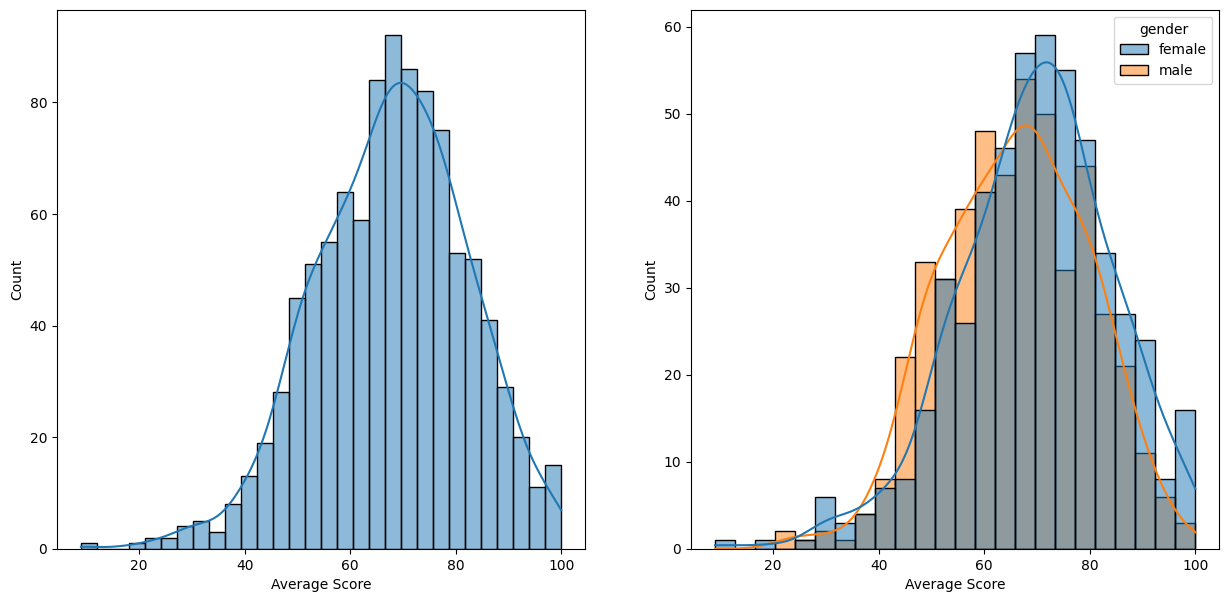

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df['Average Score'], bins=30, kde=True, ax=axs[0])
plt.subplot(122)
sns.histplot(data=df, x='Average Score', kde=True, hue='gender')
plt.show()